In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
scaler = StandardScaler()
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import GridSearchCV
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
df = pd.read_csv('/Users/gwagjongtae/Downloads/housingdata.csv') #데이터 불러오기
imt_mean = SimpleImputer(strategy='mean')
df = pd.DataFrame(imt_mean.fit_transform(df), columns=df.columns) #sklearn을 통한 결측치 처리(평균값)

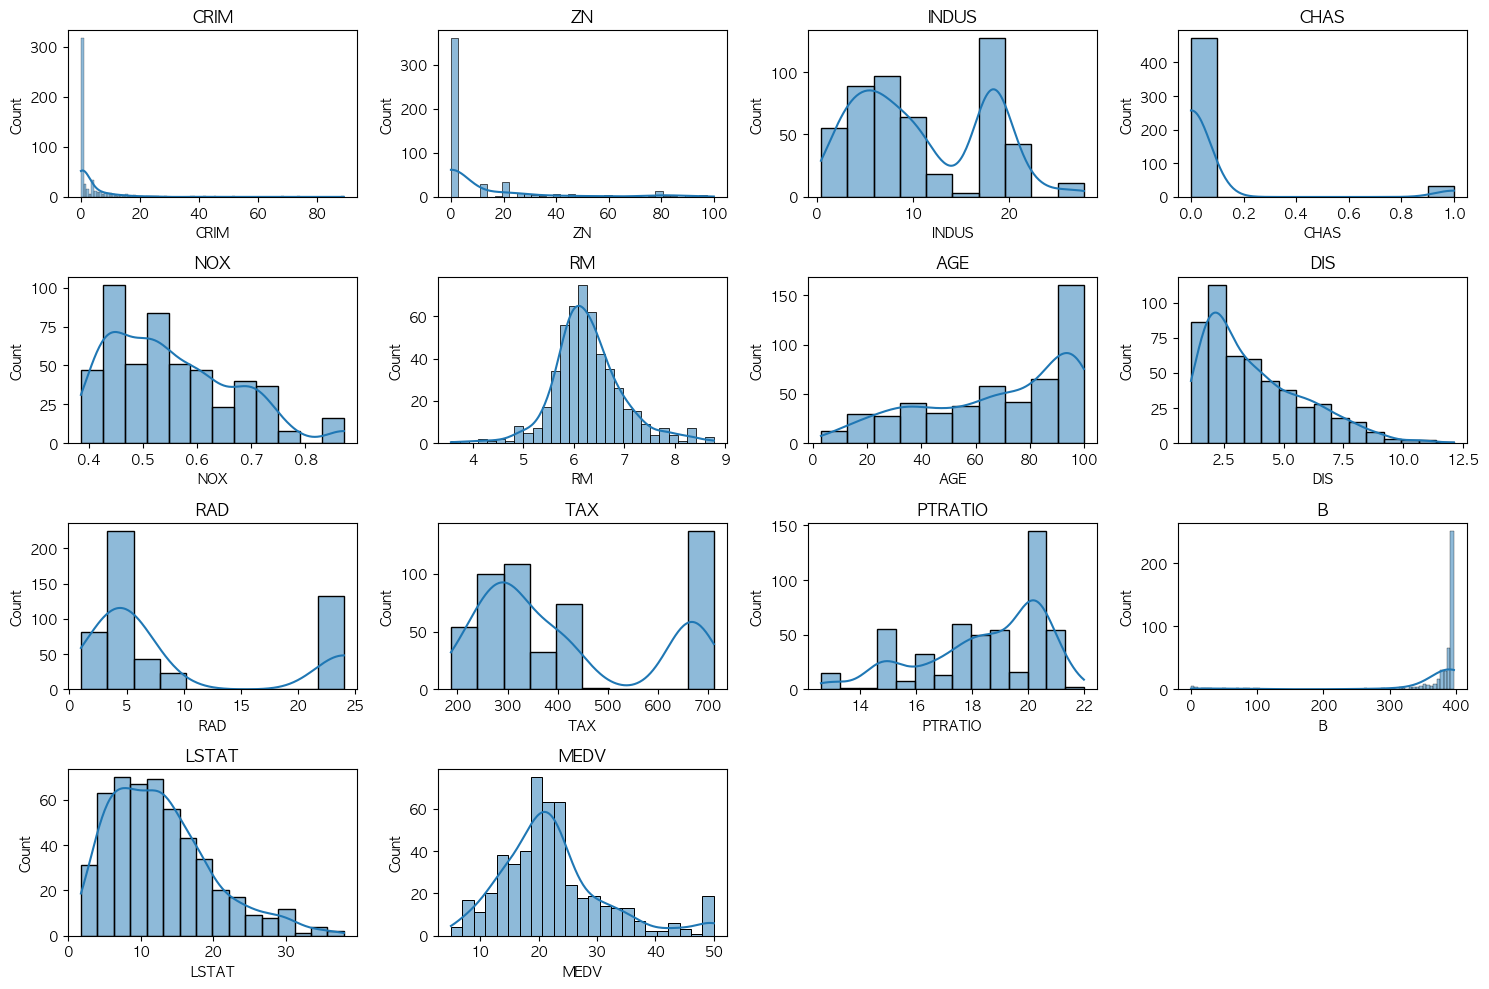

In [3]:
fig = plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show() #히스토그램을 통해 데이터의 분포 확인

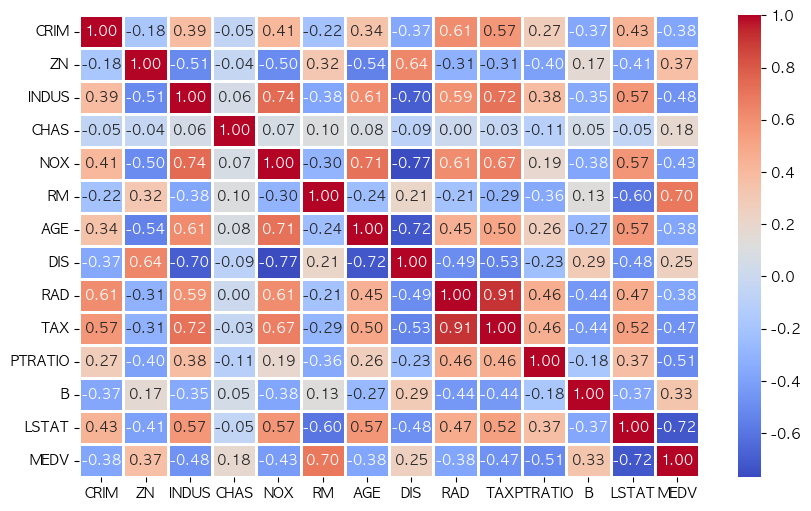

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidth=1, cmap='coolwarm')
plt.show() #상관관계 히트맵을 통해 데이터의 상관관계 확인(종속변수와 독립변수끼리는 상관관계가 높아야하고 독립변수끼리는 상관관계가 낮아야함)

In [5]:
#train데이터프레임의 상관관계를 보았을 때 특징을 선택할 때
#'CRIM','ZN','INDUS','CHAS','RM','AGE','RAD','PTRATIO','B','LSTAT' 이 특징들을 선택하는 것이 좋다고 판단됨
#여기서 CHAS는 종속변수와의 관계성이 낮은데 선택사항에 올린 이유는 독립변수와의 상관성이 매우 낮기 때문에 선택 사항에 올려보았음
#사용하지 않을 특징 'NOX','DIS','TAX' 위 특징들은 독립변수끼리의 상관성이 너무 높아 사용하지 않을 특징으로 판단됨
#'ZN','INDUS','AGE' 해당 특징도 지켜보면서 제거해야할지 판단해야함

In [6]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] <= upper_bound) & (df[column] >= lower_bound)] #이상치 제거 함수 생성(안쪽 울타리)

In [7]:
def outliers2(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3.0 * iqr
    upper_bound = q3 + 3.0 * iqr
    return df[(df[column] <= upper_bound) & (df[column] >= lower_bound)] #이상치 제거 함수 생성(바깥 울타리)

In [8]:
column_list = ['RM','AGE']
column_list2 = ['LSTAT','PTRATIO','RAD'] #outliers 함수 적용 특징
df = df[column_list + column_list2 + ['MEDV']] # 컬럼 추출
for column in column_list:
    df = outliers(df, column)
for column in column_list2:
    df = outliers2(df, column)
print(df)

        RM        AGE      LSTAT  PTRATIO  RAD  MEDV
0    6.575  65.200000   4.980000     15.3  1.0  24.0
1    6.421  78.900000   9.140000     17.8  2.0  21.6
2    7.185  61.100000   4.030000     17.8  2.0  34.7
3    6.998  45.800000   2.940000     18.7  3.0  33.4
4    7.147  54.200000  12.715432     18.7  3.0  36.2
..     ...        ...        ...      ...  ...   ...
501  6.593  69.100000  12.715432     21.0  1.0  22.4
502  6.120  76.700000   9.080000     21.0  1.0  20.6
503  6.976  91.000000   5.640000     21.0  1.0  23.9
504  6.794  89.300000   6.480000     21.0  1.0  22.0
505  6.030  68.518519   7.880000     21.0  1.0  11.9

[476 rows x 6 columns]


In [9]:
X = df[column_list + column_list2 ]
y = df[['MEDV']] #X,y 분리
X=scaler.fit_transform(X)
y=scaler.fit_transform(y) #데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#train데이터 test데이터 분리

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_linear_train)
r2_train = r2_score(y_train, y_pred_linear_train)
mae_train = mean_absolute_error(y_train, y_pred_linear_train)
print(f"Train Mean Absolute Error: {mae_train:.2f}")
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Train R-squared: {r2_train:.2f}")
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"linear_Mean Absolute Error: {mae:.2f}")
print(f"linear_Mean Squared Error: {mse:.2f}")
print(f"linear_R-squared: {r2:.2f}") #선형회귀 모델 평가

Train Mean Absolute Error: 0.42
Train Mean Squared Error: 0.39
Train R-squared: 0.62
linear_Mean Absolute Error: 0.38
linear_Mean Squared Error: 0.30
linear_R-squared: 0.67


In [11]:
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree_train = tree_model.predict(X_train)
mse_tree_train = mean_squared_error(y_train, y_pred_tree_train)
r2_tree_train = r2_score(y_train, y_pred_tree_train)
mae_tree_train = mean_absolute_error(y_train, y_pred_tree_train)
print(f"Train Mean Absolute Error: {mae_tree_train:.2f}")
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Train R-squared: {r2_train:.2f}")
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred)
print(f"tree_Mean Absolute Error: {mae:.2f}")
print(f'tree_Mean Squared Error: {mse_tree:.2f}')
print(f'tree_R-squared: {r2_tree:.2f}') #의사결정나무 모델 평가

Train Mean Absolute Error: 0.38
Train Mean Squared Error: 0.39
Train R-squared: 0.62
tree_Mean Absolute Error: 0.38
tree_Mean Squared Error: 0.25
tree_R-squared: 0.72


In [12]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)
print(f"Train Mean Absolute Error: {mae_rf_train:.2f}")
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Train R-squared: {r2_train:.2f}")
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)
print(f"rf_Mean Absolute Error: {mae:.2f}")
print(f'rf_Mean Squared Error:{mse_rf:.2f}')
print(f'rf_R-squared: {r2_rf:.2f}') #랜덤포레스트 모델 평가

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Mean Absolute Error: 0.13
Train Mean Squared Error: 0.39
Train R-squared: 0.62
rf_Mean Absolute Error: 0.38
rf_Mean Squared Error:0.20
rf_R-squared: 0.78


In [13]:
#3개의 모델을 가지고 모델 평가를 진행하였을 때 랜덤포레스트가 가장 좋은 성능을 보였다.
#랜덤포레스트는 여러개의 의사결정나무를 만들어 각각의 예측값을 평균내어 예측하는 방법이다.
#이 방법은 과적합을 방지하고 일반화된 모델을 만들어 예측하는 데 효과적이다.
#따라서 랜덤포레스트를 사용하여 모델을 만들어 예측하는 것이 좋다고 판단된다.

In [14]:
importance_df = pd.DataFrame({
    '특성': column_list+column_list2,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending=False) #특성 중요도 데이터프레임 생성


모델 성능 비교:
        Model  Data   MSE    R2   MAE
Random Forest Train 0.039 0.962 0.131
Random Forest  Test 0.201 0.777 0.382


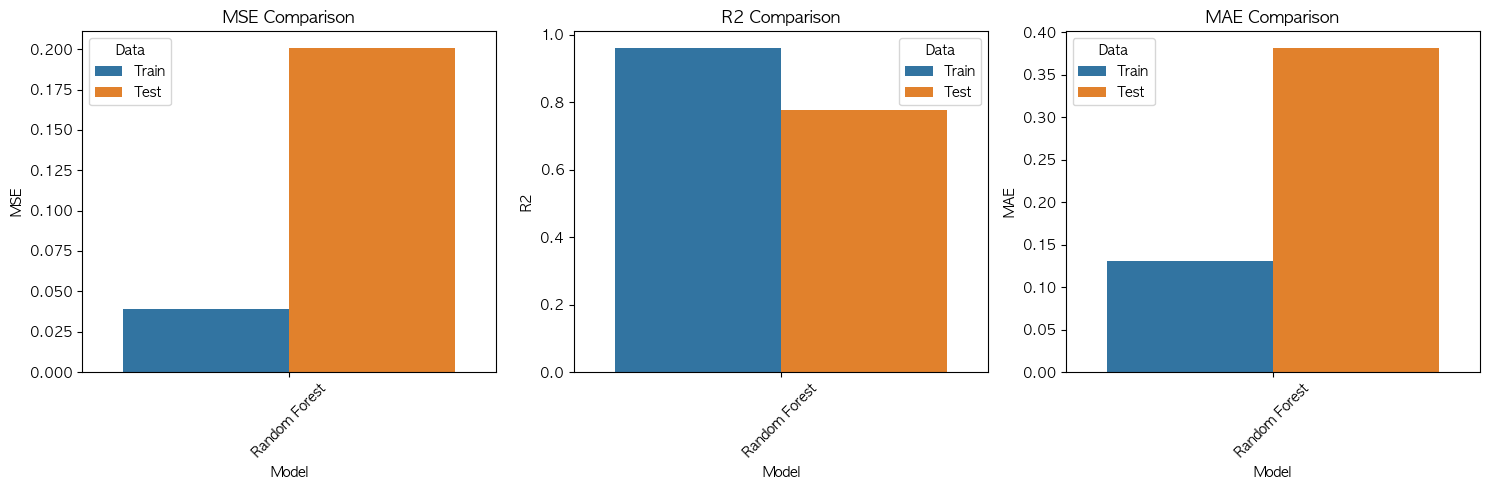

In [15]:
results = {
    'Model': ['Random Forest', 'Random Forest'],
    'Data': ['Train', 'Test'],
    'MSE': [mse_rf_train, mse_rf],
    'R2': [r2_rf_train, r2_rf],
    'MAE': [mae_rf_train, mae_rf] }

results_df = pd.DataFrame(results)
results_df[['MSE', 'R2', 'MAE']] = results_df[['MSE', 'R2', 'MAE']].round(3)
print("\n모델 성능 비교:")
print(results_df.to_string(index=False))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x='Model', y='MSE', hue='Data')
plt.title('MSE Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(data=results_df, x='Model', y='R2', hue='Data')
plt.title('R2 Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=results_df, x='Model', y='MAE', hue='Data')
plt.title('MAE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show() #랜덤포레스트 모델 성능 비교 그래프

/var/folders/1t/hxb2r_4s0gq3gsq81_dt2tn80000gn/T/ipykernel_6069/29954010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='특성', y='중요도', palette='viridis')


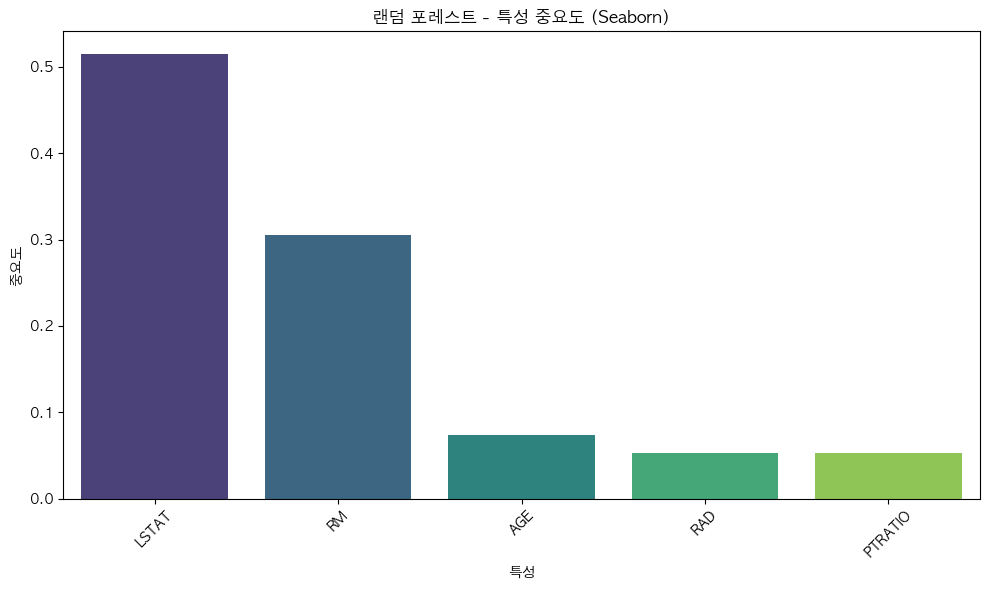

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='특성', y='중요도', palette='viridis')
plt.xticks(rotation=45)
plt.title('랜덤 포레스트 - 특성 중요도 (Seaborn)')
plt.tight_layout()
plt.show() #특성과 중요도에 대한 그래프

In [17]:
#해당 그래프를 통해 종속변수에 영향을 가장 많이 주는 특성이 'LSTAT'이라는 것을 알 수 있다.
#해당 특성은 하위 계층의 비율이므로 하위 계층의 비율이 높을수록 주택 가격이 낮아지는 것을 알 수 있다.

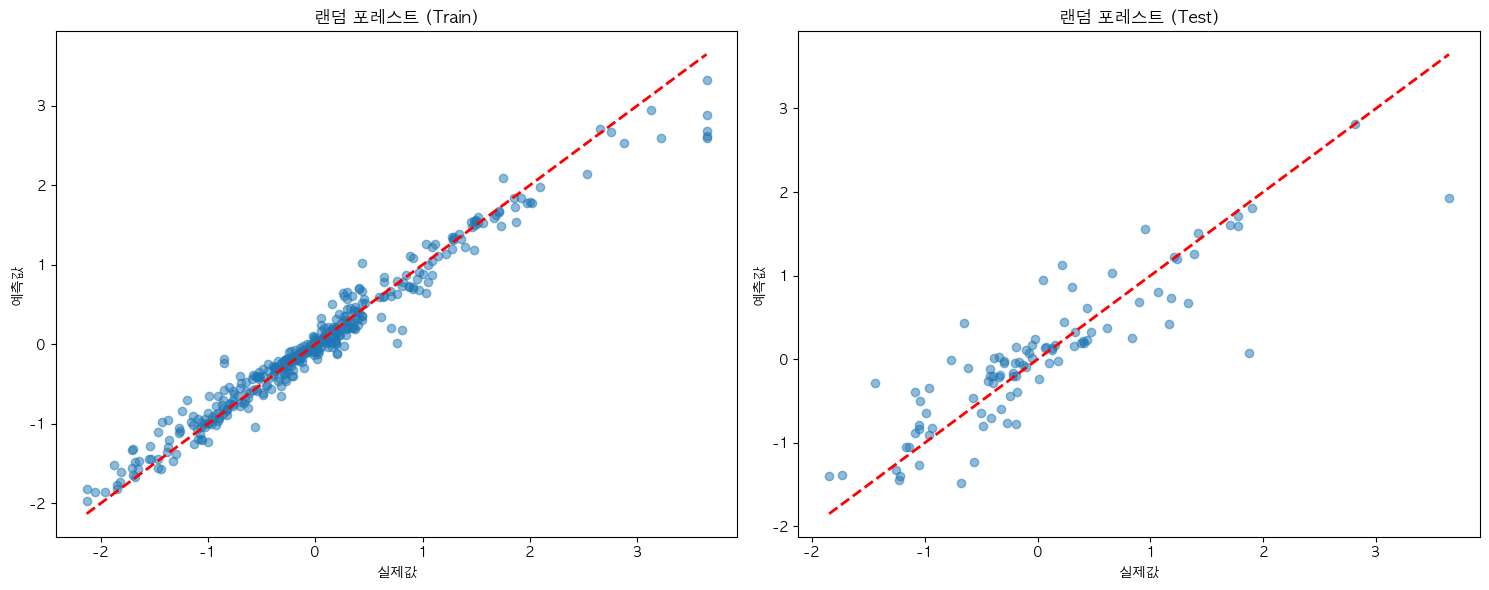


랜덤 포레스트 성능:
Train 데이터:
MSE: 0.04
R2: 0.96
MAE: 0.13

Test 데이터:
MSE: 0.20
R2: 0.78
MAE: 0.38


In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_train, y_pred_rf_train, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('실제값')
ax1.set_ylabel('예측값')
ax1.set_title('랜덤 포레스트 (Train)')

ax2.scatter(y_test, y_pred_rf, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('실제값')
ax2.set_ylabel('예측값')
ax2.set_title('랜덤 포레스트 (Test)')

plt.tight_layout()
plt.show()

print("\n랜덤 포레스트 성능:")
print("Train 데이터:")
print(f"MSE: {mse_rf_train:.2f}")
print(f"R2: {r2_rf_train:.2f}")
print(f"MAE: {mae_rf_train:.2f}")
print("\nTest 데이터:")
print(f"MSE: {mse_rf:.2f}")
print(f"R2: {r2_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")

In [19]:
bagging_model = BaggingRegressor(estimator=rf_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging_train = bagging_model.predict(X_train)
mse_bagging_train = mean_squared_error(y_train, y_pred_bagging_train)
r2_bagging_train = r2_score(y_train, y_pred_bagging_train)
mae_bagging_train = mean_absolute_error(y_train, y_pred_bagging_train)
print(f"Train Mean Absolute Error: {mae_bagging_train:.2f}")
print(f"Train Mean Squared Error: {mse_bagging_train:.2f}")
print(f"Train R-squared: {r2_bagging_train:.2f}") #배깅 모델 평가

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train Mean Absolute Error: 0.21
Train Mean Squared Error: 0.11
Train R-squared: 0.90


In [20]:
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting_train = boosting_model.predict(X_train)
mse_boosting_train = mean_squared_error(y_train, y_pred_boosting_train)
r2_boosting_train = r2_score(y_train, y_pred_boosting_train)
mae_boosting_train = mean_absolute_error(y_train, y_pred_boosting_train)
print(f"Train Mean Absolute Error: {mae_boosting_train:.2f}")
print(f"Train Mean Squared Error: {mse_boosting_train:.2f}")
print(f"Train R-squared: {r2_boosting_train:.2f}") #그래디언트 부스팅 모델 평가

Train Mean Absolute Error: 0.19
Train Mean Squared Error: 0.07
Train R-squared: 0.94


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

최적 하이퍼파라미터:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

최고 R² 점수: 0.725

최적 모델 성능:
Train 데이터:
MSE: 0.078
R2: 0.924
MAE: 0.178

Test 데이터:
MSE: 0.178
R2: 0.802
MAE: 0.293


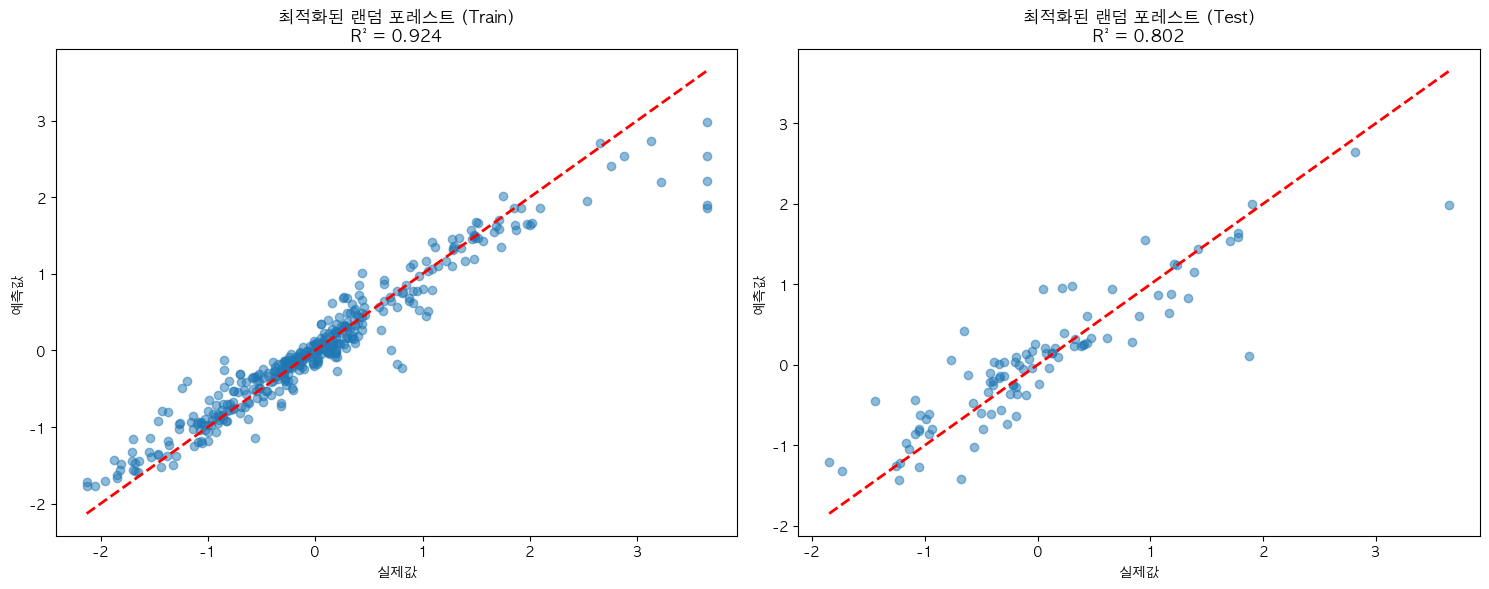

In [21]:
import warnings
warnings.filterwarnings('ignore')

y_train = y_train.ravel()
y_test = y_test.ravel()

param_grid = {
    'n_estimators': [100, 200, 500],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt']  
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,               
    n_jobs=-1,          
    scoring='r2',       
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("\n최적 하이퍼파라미터:")
print(rf_grid.best_params_)
print(f"\n최고 R² 점수: {rf_grid.best_score_:.3f}")

best_rf = rf_grid.best_estimator_
y_pred_best_train = best_rf.predict(X_train)
y_pred_best = best_rf.predict(X_test)

mse_best_train = mean_squared_error(y_train, y_pred_best_train)
r2_best_train = r2_score(y_train, y_pred_best_train)
mae_best_train = mean_absolute_error(y_train, y_pred_best_train)

mse_best_test = mean_squared_error(y_test, y_pred_best)
r2_best_test = r2_score(y_test, y_pred_best)
mae_best_test = mean_absolute_error(y_test, y_pred_best)

print("\n최적 모델 성능:")
print("Train 데이터:")
print(f"MSE: {mse_best_train:.3f}")
print(f"R2: {r2_best_train:.3f}")
print(f"MAE: {mae_best_train:.3f}")
print("\nTest 데이터:")
print(f"MSE: {mse_best_test:.3f}")
print(f"R2: {r2_best_test:.3f}")
print(f"MAE: {mae_best_test:.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_train, y_pred_best_train, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('실제값')
ax1.set_ylabel('예측값')
ax1.set_title(f'최적화된 랜덤 포레스트 (Train)\nR² = {r2_best_train:.3f}')

ax2.scatter(y_test, y_pred_best, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('실제값')
ax2.set_ylabel('예측값')
ax2.set_title(f'최적화된 랜덤 포레스트 (Test)\nR² = {r2_best_test:.3f}')

plt.tight_layout()
plt.show() #하이퍼파라미터 최적화 모델 평가